# Markov Chains and Hidden Markov Models (MACS 30200)
### by [Richard W. Evans](https://sites.google.com/site/rickecon/), May 2018
The code in this Jupyter notebook was written using Python 3.6.

## 1. QuantEcon Markov notebook
See QuantEcon notebook on [Finite Markov Chains](https://lectures.quantecon.org/py/finite_markov.html).

## 2. Discrete diagrams to Markov processes and interpretations

### 2.1. 2-state systems
Assume that you can have two types of day in period $t$: $x_{1,t}$= good day, $x_{2,t}$= bad day.

$$ X_t = [x_{1,t}, x_{2,t}] $$

What are some interpretations of this $X_t$ vector? What values can its entries take on? What might those values mean?

Let's further assume that the probability of tomorrow being a good day given that today is a good day $Pr(x_{1,t+1}|x_{1,t}) = \pi_{1,1}$. Because there is only one other outcome that tomorrow can have, then we know that the probability of tomorrow being a bad day given that today is a good day is $Pr(x_{2,t+1}|x_{1,t}) = 1 - \pi_{1,1}$.

We could also assume some different probabilities for the quality of tomorrow's day if today is a bad day. If we assume that the probability of tomorrow being a bad day given that today is a bad day is $Pr(x_{2,t+1}|x_{2,t}) = \pi_{2,2}$, then there is only one other outcome that tomorrow can have and we know that the probability of tomorrow being a good day given that today is a bad day is $Pr(x_{2,t+1}|x_{2,t}) = 1 - \pi_{2,2}$.

How might we simulate the time series of a person's quality of days $X_t$? How might we interpret the results? How important are the assumed probabilities $\pi_{j,k}$?

Let's construct a transition matrix $P$ that lists all the assumed probabilities from the previous paragraph in a particular way and has typical element $\pi_{j,k}$.

$$ P = \begin{bmatrix} \pi_{1,1} & 1 - \pi_{1,1} \\
                     1 - \pi_{2,2} & \pi_{2,2} \end{bmatrix} $$

What does the following equation or law of motion mean?

$$ X_{t+1} = P^T X_t \quad\Rightarrow\quad \begin{bmatrix}x_{1,t+1} \\ x_{2,t+1}\end{bmatrix} = \begin{bmatrix} \pi_{1,1} & 1 - \pi_{2,2} \\
                1 - \pi_{1,1} & \pi_{2,2} \end{bmatrix}\begin{bmatrix} x_{1,t} \\ x_{2,t}\end{bmatrix} $$

In [ ]:
import numpy as np

pi_11 = 0.8
pi_22 = 0.5
P = np.array([[pi_11, 1 - pi_11], [1 - pi_22, pi_22]])
print(P)
print()
print(P.T)

In [ ]:
# What if today is a good day?
X_t = np.array([[1.0], [0.0]])  # Make a 2 x 1 vector
X_tp1 = np.dot(P.T, X_t)
print(X_tp1)

How do we interpret this vector for $X_{t+1}$ from a current period vector $X_t$ in which today was a good day? These represent the number of people

How would we interpret $X_{t+2}$ goint from this $X_{t+1}$?

In [ ]:
X_tp2 = np.dot(P.T, X_tp1)
print(X_tp2)

How does this look if I do it a bunch of times? What do you predict for $x_{1,t+u}$ and for $x_{2,t+u}$?

In [ ]:
Sims = 25
X_0_good = np.array([[1.0], [0.0]])
Xmat = np.zeros((Sims, 2))
Xmat[0, :] = X_0_good.flatten()

X_t = X_0_good
for sim in range(1, Sims):
    X_tp1 = np.dot(P.T, X_t)
    Xmat[sim, :] = X_tp1.flatten()
    X_t = X_tp1

print(Xmat)

Is there a way to know what any row of that `Xmat` matrix is with one line of code using only the initial distribution `X_0` and the transition matrix `P` rather than the whole `for` loop?

In [ ]:
x_row_u = ?

Let's plot the two time series of $x_{1,t}$ and $x_{2,t}$.

In [ ]:
# Import the plotting libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib notebook

In [ ]:
# Plot the two time series of $x_{1,t}$ and $x_{2,t}$
per_vec = np.arange(1, Sims + 1)
plt.plot(per_vec, Xmat[:, 0], 'k-', label='Good day')
plt.plot(per_vec, Xmat[:, 1], 'r--', label='Bad day')
plt.grid(b=True, which='major', color='0.65', linestyle=':')
plt.title('Time series of good day and bad day', fontsize=20)
plt.xlabel(r'Period $t$')
plt.ylabel(r'Percent probability')
plt.legend()

What is the diagram for the Markov process of this system? Draw it?

How do we interpret the process if the initial value is more like a population distribution? Can we still use the Markov transition matrix `P` as a valid transition matrix?

In [ ]:
X_0 = np.array([[100.0], [20.0]])

### 2.2. 3-state Markov systems
Consider a 3-state system $X_t = [x_{1,t}, x_{2,t}, x_{3,t}]$ in which $x_{1,t}=healthy$, $x_{2,t}=sick$, and $x_{3,t}=dead$. What is the Markov transition matrix $P$ that corresponds to this diagram of a 3-state system?

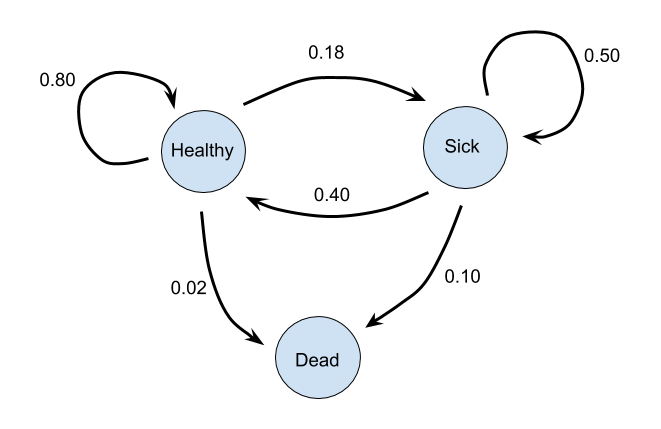

$$ P = \begin{bmatrix} \pi_{1,1} & \pi_{1,2} & \pi_{1,3} \\
                       \pi_{2,1} & \pi_{2,2} & \pi_{2,3} \\
                       \pi_{3,1} & \pi_{3,2} & \pi_{3,3} \end{bmatrix} $$

In [ ]:
pi_11 = ?
pi_12 = ?
pi_13 = ?

pi_21 = ?
pi_22 = ?
pi_23 = ?

pi_31 = ?
pi_32 = ?
pi_33 = ?

P2 = np.array([[pi_11, pi_12, pi_13],
               [pi_21, pi_22, pi_23],
               [pi_31, pi_32, pi_33]])
print(P2)

If you start at any $X_t$ and simulate that system for a long time, what will be the long-run probability of everyone?

In [ ]:
x_10 = ?
x_20 = ?
x_30 = ?
X_0 = np.array([[x_10], [x_20], [x_30]])

Sims2 = 30
Xmat2 = np.zeros((Sims2, 3))
X_t = X_0
Xmat2[0, :] = X_t.flatten()

for sim in range(1, Sims2):
    X_tp1 = np.dot(P2.T, X_t)
    Xmat[sim, :] = X_tp1.flatten()
    X_t = X_tp1

print(Xmat)

## 3. Definitions
We first define a **stochastic matrix** to represent a certain type of conditional distribution. This type of stochastic matrix is a Markov transition matrix. A stochastic matrix is a square matrix $P$ whose entries $\pi_{j,k}\geq 0$ and whose rows sum to one $\sum_{k=1}^K \pi_{j,k} = 1$ and where $J=K$ (square matrix).

$$ P = \begin{bmatrix} \pi_{1,1} & \pi_{1,2} & ...    & \pi_{1,K} \\
                       \pi_{2,1} & \pi_{2,2} & ...    & \pi_{2,K} \\
                       \vdots    & \vdots    & \ddots & \vdots    \\
                       \pi_{J,1} & \pi_{J,2} & ...    & \pi_{J,K} \end{bmatrix} $$
                       
Let a random variable $x_t$ have a discrete, finite set of values it can take on.

$$ \mathcal{X} = [x_1, x_2, ... x_N] $$

$\mathcal{X}$ is the **state space**, and the invidual values $x_n$ are called **state values**. Let $X_t$ be an unconditional distribution over state values $x_n$.

$$ X_t = \begin{bmatrix} Pr(x_1) \\ Pr(x_2) \\ \vdots \\ Pr(x_N) \end{bmatrix} $$

Note that this unconditional distribution at time $t$ could also be written as a population instead of probabilities by multiplying $X_t$ by a scalar.

A **Markov process** is a stochastic process that satisfies the **Markov property**. The Markov property can be summarized as the characteristic that the future distribution of a system is completely determined by the current distribution of a system $X_t$ and the stationary Markov transition matrix $P$.

$$ Pr(x_{k,t+1}) = Pr(x_{k,t+1}|x_{j,t})Pr(x_{j,t}) \quad\iff\quad X_{t+1} = P^T X_t $$

In a Markov process, the Markov transition matrix $P$ represents the conditional probability of $x_{k,t+1}$ tomorrow given $x_{j,t}$ today. In a Markov process, this conditional probability or transition matrix $P$ is constant across time (i.e., stationary, time invariant). This implies that the distribution of the random variable $X_{t+u}$ $u\geq 1$ periods in the future is simply a function of the current distribution $X_t$ and the Markov transition matrix.

$$ Pr(x_{k,t+u}) = \Bigl[\Pi_{v=t}^{t+u-1} Pr(x_{k,v+1}|x_{j,v})\Bigr]Pr(x_{j,t}) \quad\Rightarrow\quad X_{t+u} = \left(P^T\right)^u \: X_t $$

We can calculate the distribution of a random variable at any point in time in the future by simply multiplying the current distribution by the requisite power of the one-period Markov transition matrix. This is exactly what we did in the cell blocks above in Section 2.

Also note here that the distribution $X_{t+u}$ need not be a probability distribution. Or rather $X_t$ can be transformed into a probability distribution by dividing $X_t$ by the requisite scalar.

## 4. Ergodicity
Despite its simplicity, a Markov process characterized by Markov transition matrix $P$ can generate some pretty rich dynamics. As we saw in the 3-state example from Section 2.2, some states can be absorbing and the long-run distribution can be degenerate. It is also true that Markov processes can have multiple long-run distributions or the distribution might cycle between after some time. Another process from Murphy (2012, Fig. 17b) has multiple potential long-run distributions.

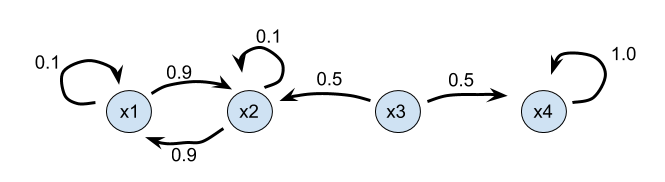

If one starts the system at $x_4$, then the system stays at $x_4$ forever. If one starts the system at either $x_1$ or $x_2$, the long-run distribution will be based on the probabilities between the two states. If one starts the system at $x_3$, the long run distribution of the system will be a coin flip betwee the degenerate distribution at $x_4$ and the distribution based on the probabilities between $x_1$ and $x_2$.

An important property for a Markov transition matrix $P$ that helps guarantee the existence of a unique long-run distribution is that each state be reachable after some number of periods from any other state. This means no absorbing states. A Markov transition matrix with this property is called **irreducible**.

A Markov transition matrix is said to be **ergodic** if it has the properties of being **aperiodic** and **non-null recurrent**. [See Murphy (2012, pp. 600-601).]

Theorem: Every irreducible (singly connected), ergodic Markov chain has a limiting distribution $\textbf{V}$, its unique **stationary distribution**.

$$ \textbf{V} = P^T\textbf{V} $$

The stationary distribution $\textbf{V}$ is sometimes called the **ergodic distribution**. It means that if $X_t = \textbf{V}$, then $X_{t+1} = \textbf{V}$.

The theorem gives you conditions in which the stationary distribution will exist and will be unique. The stationary distribution tells you what the distribution will look like in the long run. The Markov transition matrix $P$ lets you calculate what the distribution will be in any point in time $t+u$ given the current distribution $X_t$.

There are two ways to calculate the stationary distribution. When the theorem holds true, both methods give the same answer. When the theorem does not hold true, both methods might not give the same answer.

### 4.1. Eigenvalue-eigenvector decomposition
The stationary equation $\textbf{V} = P^T\textbf{V}$ can be rewritten in the classic eigenvalue-eigenvector decomposition form for the matrix $P^T$.

$$ \left(P^T - \lambda\textbf{I}\right)\textbf{V} = \textbf{0} \quad\text{where}\quad \lambda=1$$

In this equation $\lambda$ is a vector of eigenvalues and $\textbf{V}$ is a matrix of eigenvectors. The $i$th column of the matrix of eigenvectors is the eigenvector associated with the $i$th eigenvalue $\lambda_i$. The stationary distribution of the system is therefore the eigenvector $\textbf{V}$ associated with the eigenvalue equal to $\lambda_i=1$. Because the eigenvector is only true up to a constant, you will likely need to normalize it to make its entries sum to 1.

In [ ]:
pi_11 = 0.8
pi_22 = 0.5
P = np.array([[pi_11, 1 - pi_11], [1 - pi_22, pi_22]])
print(P)
print()
print(P.T)

In [ ]:
import numpy.linalg as LA

eigvals, eigvecmat = LA.eig(P.T)
one_ind = np.argwhere(eigvals == 1).flatten()
eigvec = eigvecmat[:, one_ind] / eigvecmat[:, one_ind].sum()
stat_dist = eigvec
print(stat_dist)

### 4.2. Power tranformation of P matrix
Another way to find the stationary distribution of a Markov process is to iterate on the current distribution until it is no longer changing to an arbitrary degree of precision. This is equivalent to multiplying the initial distribution by the transition matrix raised to an arbitrarily high power (analogous to going an arbitrarily high number of periods into the future).

In [ ]:
X_0 = np.array([[1.0], [0.0]])
X_stat = np.dot(LA.matrix_power(P.T, 100), X_0)
print(X_stat)

## 5. Simulation
How would you simulate a Markov process? And how is that different from simulating a continuous stochastic process?

## 6. Examples of uses
* Page rank
* Text prediction
* Demographics
* MCMC
* Approximating AR(1)
* Estimating hidden processes (health care)

## 7. Estimation

## 8. References
* Murphy, Kevin P., *Machine Learning: A Probabilistic Perspective*, MIT Press (2012).
* 